In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np

In [ ]:
def bondValue(coupon, par_value, rate, total_payment_number):
  price=0
  for x in range(1, total_payment_number+1):
    normalized_coupon_value = coupon*(1/rate)*(1-(1/((1+rate)**total_payment_number)))
    normalized_par_value =  par_value*(1/((1+rate)**total_payment_number))
    price += normalized_coupon_value + normalized_par_value
  return price/total_payment_number


In [ ]:
temp = bondValue(100*0.04, 100, 0.04, 4)
temp

100.0

In [ ]:
data = pd.read_csv("yield-curve-rates-1990-2023.csv")
data.to_csv("new_yield_curve_rates.csv", index=True)
#data.set_index('Date', inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-12-29,5.60,5.59,5.40,5.41,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.20,4.03
1,2023-12-28,5.57,5.55,5.45,5.42,5.28,4.82,4.26,4.02,3.83,3.84,3.84,4.14,3.98
2,2023-12-27,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95
3,2023-12-26,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
4,2023-12-22,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,1990-01-08,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8503,1990-01-05,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8504,1990-01-04,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8505,1990-01-03,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


In [ ]:
#data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data["4 Yr"] = (data["3 Yr"] + data["5 Yr"])/2
data["6 Yr"] = (data["5 Yr"] + data["7 Yr"])/2
data["8 Yr"] = (data["7 Yr"]*2 + data["10 Yr"])/3
data["9 Yr"] = (data["7 Yr"] + data["10 Yr"]*2)/3
data

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,4 Yr,6 Yr,8 Yr,9 Yr
0,2023-12-29,5.60,5.59,5.40,5.41,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.20,4.03,3.925,3.860,3.880000,3.880000
1,2023-12-28,5.57,5.55,5.45,5.42,5.28,4.82,4.26,4.02,3.83,3.84,3.84,4.14,3.98,3.925,3.835,3.840000,3.840000
2,2023-12-27,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95,3.875,3.795,3.803333,3.796667
3,2023-12-26,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04,3.970,3.900,3.903333,3.896667
4,2023-12-22,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05,3.955,3.895,3.913333,3.906667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,1990-01-08,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,7.935,7.985,8.040000,8.030000
8503,1990-01-05,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,7.930,7.975,8.016667,8.003333
8504,1990-01-04,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,7.920,7.965,8.006667,7.993333
8505,1990-01-03,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,7.940,7.980,8.023333,8.006667


In [ ]:
data["Number of Payments Left"] = 0
data = data.iloc[::-1]
data

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,4 Yr,6 Yr,8 Yr,9 Yr,Number of Payments Left
8506,1990-01-02,NaN,NaN,7.83,NaN,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,7.885,7.925,7.966667,7.953333,0
8505,1990-01-03,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,7.940,7.980,8.023333,8.006667,0
8504,1990-01-04,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,7.920,7.965,8.006667,7.993333,0
8503,1990-01-05,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,7.930,7.975,8.016667,8.003333,0
8502,1990-01-08,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,7.935,7.985,8.040000,8.030000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05,3.955,3.895,3.913333,3.906667,0
3,2023-12-26,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04,3.970,3.900,3.903333,3.896667,0
2,2023-12-27,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95,3.875,3.795,3.803333,3.796667,0
1,2023-12-28,5.57,5.55,5.45,5.42,5.28,4.82,4.26,4.02,3.83,3.84,3.84,4.14,3.98,3.925,3.835,3.840000,3.840000,0


In [ ]:
data.dtypes

Date                       datetime64[ns]
1 Mo                              float64
2 Mo                              float64
3 Mo                              float64
4 Mo                              float64
6 Mo                              float64
1 Yr                              float64
2 Yr                              float64
3 Yr                              float64
5 Yr                              float64
7 Yr                              float64
10 Yr                             float64
20 Yr                             float64
30 Yr                             float64
4 Yr                              float64
6 Yr                              float64
8 Yr                              float64
9 Yr                              float64
Number of Payments Left             int64
dtype: object

In [ ]:
import pandas as pd

def update_payments_left(data, date):
    # Convert date to datetime object
    date = pd.to_datetime(date)

    # Find the next year from the given date
    next_year_date = date + pd.DateOffset(years=1)

    # Get the maximum date in the DataFrame
    max_date = data['Date'].max()

    # Iterate through rows
    num_pay_left = 5
    iterator = num_pay_left
    while date <= max_date:
        for index, row in data.iterrows():
            row_date = pd.to_datetime(row['Date'])
            # Check if the row date falls within the specified range
            if date <= row_date <= next_year_date:
                # Update the "Number of Payments Left" column to 10
                data.at[index, 'Number of Payments Left'] = num_pay_left
        num_pay_left -= 1
        date += pd.DateOffset(years=1)
        next_year_date += pd.DateOffset(years=1)

    data['Number of Payments Left'] = data['Number of Payments Left'].apply(lambda x: max(0, x))
    data["Face Value"] = np.where(data["Number of Payments Left"]>0, 100, 0)
    data["Rate"] = 0
    for i in range(iterator):
      data["Rate"] = np.where(data["Number of Payments Left"]==i+1, data[f"{i+1} Yr"], data["Rate"])
    return data

# Example usage:
# Assuming data is your DataFrame containing the data
# and 'Date' column represents the date
# Replace 'desired_date' with the date you want to use
# for updating the "Number of Payments Left" column
desired_date = '1990-01-02'
updated_data = update_payments_left(data, desired_date)
updated_data

# Assuming 'data' is your pandas DataFrame
columns_to_drop = ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo','20 Yr', '30 Yr']  # List of column names to drop

data.drop(columns=columns_to_drop, inplace=True)
data = updated_data
data


In [ ]:
value = data[data['Date'] == desired_date]['Rate'].values[0]
data["Current Value"]=0
for i in range(len(data)):
  data["Current Value"][i] = bondValue(data["Face Value"][i]*(value/100), data["Face Value"][i], data["Rate"][i]/100, data["Number of Payments Left"][i])
data

In [ ]:
value = data[data['Date'] == desired_date]['Rate'].values[0]
value

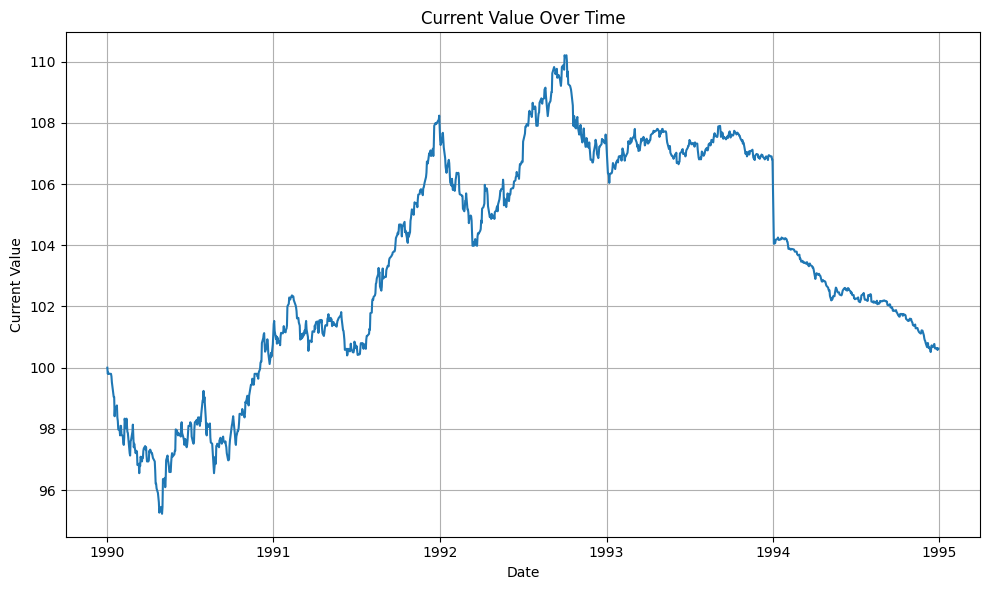

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a pandas DataFrame named 'data'

# Sort the DataFrame by the 'Date' column
data.sort_values(by='Date', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Current Value'], linestyle='-')
plt.title('Current Value Over Time')
plt.xlabel('Date')
plt.ylabel('Current Value')
plt.grid(True)
plt.tight_layout()
plt.show()